In [37]:
import Pkg; Pkg.activate(".")
using JuMP
import Ipopt
using Plots

  Activating project at `~/optimal_control_presentation`


In [122]:
g = 9.81
n = 100
Δt = 1 / n

model = Model(Ipopt.Optimizer)
set_silent(model)
@variables(model, begin
    tf ≥ eps(), (start = 10.0)
    x[1:n]
    y[1:n]
    v[1:n]
    0 ≤ u[1:n] ≤ 2π
end)

fix(x[1], 0.0; force=true)
fix(y[1], 0.0; force=true)
fix(v[1], 0.0; force=true)

@NLexpression(model, δx[j = 1:n] = v[j-1] * sin(u[j-1]) * tf)
# @NLexpression(model, )

for j in 2:n
    # rectangular integration
    # @NLconstraint(model, x[j] == x[j-1] + Δt * (v[j-1] * sin(u[j-1]) * tf))
    # @NLconstraint(model, y[j] == y[j-1] + Δt * (-v[j-1] * cos(u[j-1]) * tf))
    # @NLconstraint(model, v[j] == v[j-1] + Δt * (g * cos(u[j-1]) * tf))
    # trapezoidal integration
    @NLconstraint(model, x[j] == x[j-1] + Δt * )
    @NLconstraint(model, y[j] == y[j-1] + Δt * (-v[j-1] * cos(u[j-1]) * tf))
    @NLconstraint(model, v[j] == v[j-1] + Δt * (g * cos(u[j-1]) * tf))
end
@constraint(model, x[n] == 2.0)
@constraint(model, y[n] == -2.0)

@objective(model, Min, tf)
model

A JuMP Model
Minimization problem with:
Variables: 4001
Objective function type: VariableRef
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 2 constraints
`VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 3 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 1001 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 1000 constraints
Nonlinear: 2997 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt
Names registered in the model: tf, u, v, x, y

In [123]:
optimize!(model)
solution_summary(model)

* Solver : Ipopt

* Status
  Result count       : 1
  Termination status : LOCALLY_SOLVED
  Message from the solver:
  "Solve_Succeeded"

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Objective value    : 1.78246e+00
  Dual objective value : -2.71668e+00

* Work counters
  Solve time (sec)   : 1.29625e+01


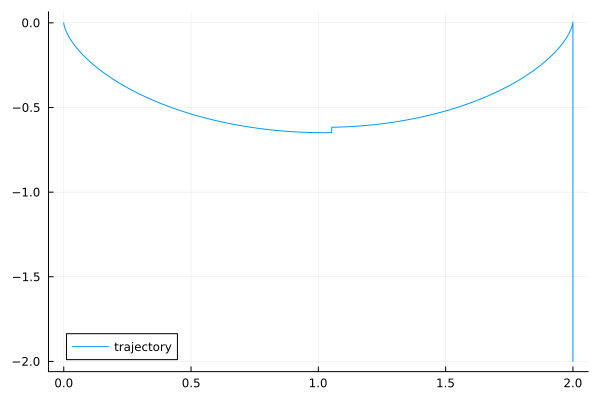

In [124]:
plot(value.(x), value.(y), label="trajectory")

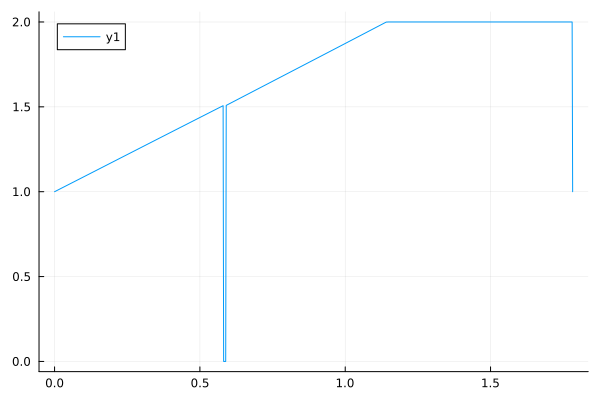

In [125]:
plot(range(0, stop=value(tf), length=n), value.(u)/π)